Calculating the eval metrix of a Confusion Matrix.
Based on Diego Renan's script.

In [17]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [8]:
tf.__version__

%load_ext tensorboard

logdir='log'

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

train_images, test_images = train_images / 255.0, test_images/255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.8933 - loss: 0.3327 - val_accuracy: 0.9862 - val_loss: 0.0443
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9848 - loss: 0.0515 - val_accuracy: 0.9885 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9895 - val_loss: 0.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 35ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9911 - val_loss: 0.0297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.9915 - val_loss: 0.0269


In [15]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


Text(0.5, 58.7222222222222, 'Predicted label')

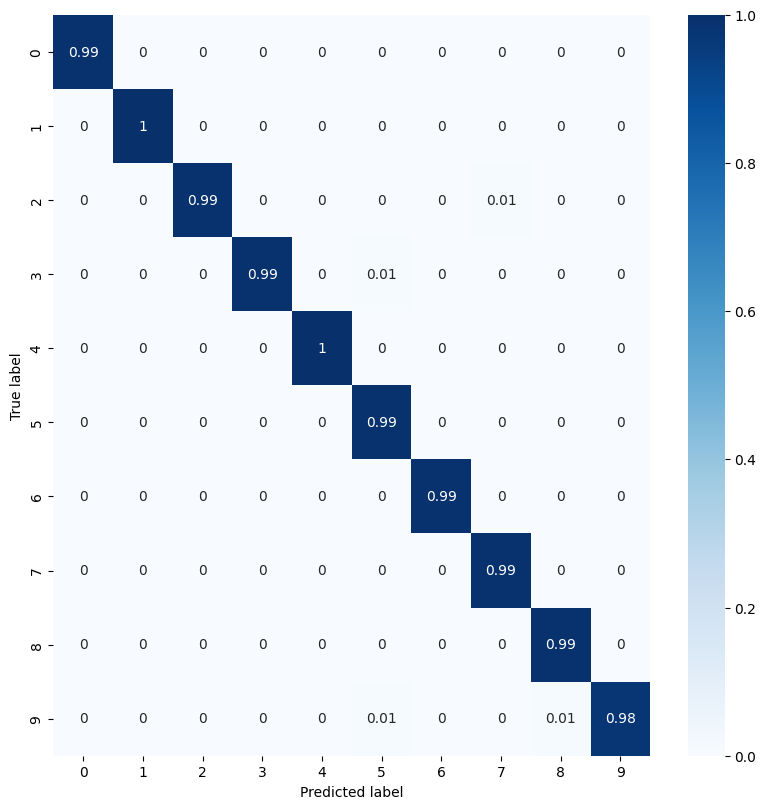

In [16]:
classes=[0,1,2,3,4,5,6,7,8,9]

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

figure = plt.figure(figsize=(8,8))

sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


Métricas:

Sensibilidade = VP/(VP+FN)
Especificidade = VN / (FP+VN)
Acuracia = (VP+VN)/N
Precisão = VP/(VP+FP)
F-score = 2x(PxS)/(P+S)

In [18]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)
con_mat = confusion_matrix(y_true, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [19]:
VP = np.diag(con_mat)
FP = con_mat.sum(axis=0) - VP
FN = con_mat.sum(axis=1) - VP
VN = con_mat.sum() - (FP + FN + VP)

In [20]:
sensibilidade = VP / (VP + FN)  # Sensibilidade
especificidade = VN / (FP + VN)  # Especificidade
acuracia = (VP + VN) / con_mat.sum()  # Acurácia
precisao = VP / (VP + FP)  # Precisão
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)  # F-score

In [21]:
metrics = {
    'Sensibilidade': sensibilidade,
    'Especificidade': especificidade,
    'Acurácia': acuracia,
    'Precisão': precisao,
    'F-score': f_score
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

   Sensibilidade  Especificidade  Acurácia  Precisão   F-score
0       0.992857        0.999446    0.9988  0.994888  0.993871
1       0.998238        0.999436    0.9993  0.995606  0.996920
2       0.989341        0.998996    0.9980  0.991262  0.990301
3       0.989109        0.999666    0.9986  0.997006  0.993042
4       0.998982        0.999224    0.9992  0.992915  0.995939
5       0.994395        0.998243    0.9979  0.982281  0.988301
6       0.990605        0.999226    0.9984  0.992678  0.991641
7       0.993191        0.998217    0.9977  0.984571  0.988862
8       0.991786        0.998671    0.9980  0.987730  0.989754
9       0.976214        0.999444    0.9971  0.994949  0.985493
